In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer

X = pd.read_csv( 'protein.csv' ) 
X = X.drop(['ID'], axis=1)
imputer = KNNImputer(n_neighbors=3)
X = imputer.fit_transform(X)

In [4]:
X=pd.DataFrame(X)
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X= scaler.fit_transform(X)
#X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9
0,-1.006417,0.882125,1.714778,-2.587934,1.715879,1.720692,-0.465769,1.135213,0.750321,0.627582
1,0.772735,-0.961301,1.639747,-2.108846,0.199883,0.568140,1.321528,-0.006901,-2.473787,-0.646808
2,-1.052577,-0.104960,1.550213,-2.576606,2.083175,2.015090,0.093019,0.959435,-0.263591,0.535906
3,-1.528830,2.176346,-0.214969,-2.021768,-2.962145,-3.295177,2.116420,-1.467550,0.579121,-1.434760
4,-1.407823,-1.028772,0.810723,4.052628,-1.700813,1.399962,2.256554,-0.818456,-1.529480,0.754909
...,...,...,...,...,...,...,...,...,...,...
489,-0.851538,-0.479357,2.271710,-1.820070,0.818096,0.141208,1.537069,0.314096,-0.341870,-1.010343
490,-1.610268,-0.184169,-0.100731,1.991430,-3.139705,4.407357,-0.010682,-1.208989,0.655864,1.034267
491,0.548784,-1.226596,1.755970,-3.334780,0.163496,1.993281,0.039038,1.018653,-1.410111,-0.662079
492,0.152008,-1.686879,1.489334,0.834950,-4.749197,-2.084045,-0.782886,-0.129883,0.496630,-1.550106


Drop all rows with z-wcore over 2

In [5]:
from scipy import stats
z = pd.DataFrame(stats.zscore(X, axis=1, ddof=1))
indexNames = z[  (np.abs(z[0])>2) | (np.abs(z[1])>2) | (np.abs(z[2])>2) | (np.abs(z[3])>2) | (np.abs(z[4]) >2) | (np.abs(z[5])>2) | (np.abs(z[6])>2) | (np.abs(z[7])>2) | (np.abs(z[8])>2) | (np.abs(z[9])>2) ].index #, z[1]>2, z[2]>2, z[3]>2 , z[4] >2 , z[5]>2 , z[6]>2 , z[7]>2 , z[8]>2 , z[9]>2
indexNames

Int64Index([  0,   2,   7,   8,   9,  10,  15,  17,  18,  19,
            ...
            483, 484, 485, 486, 487, 488, 490, 491, 492, 493],
           dtype='int64', length=280)

In [6]:
X = X.drop(indexNames )

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.array(X[3])
y = np.array(X[2])


def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

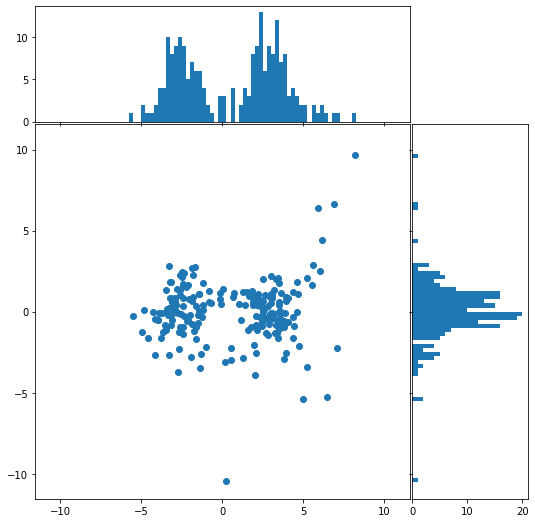

In [10]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.show()

In [21]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=5,  covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)

gm = gm.fit(X)

gm.means_

array([[ 5.68909051e-02,  2.86383155e-01, -1.62912011e-01,
         2.71815349e+00,  1.84440731e+00, -1.42387770e+00,
        -9.51621021e-01, -3.33680364e-01, -1.04726319e-02,
        -2.97477862e-01],
       [-3.81763268e-01, -1.78596685e+00, -3.90406299e-01,
         2.96752598e+00, -2.27808751e+00,  6.84647226e-01,
         1.52992404e+00,  2.84622429e-01,  2.03722444e-01,
         6.39660431e-01],
       [ 3.49988345e-01, -1.43396066e-01, -4.28317979e-02,
        -2.21044345e+00,  1.18213241e+00,  2.07043919e+00,
        -3.89176086e-01,  7.94162022e-01, -5.14345669e-01,
        -3.62197011e-01],
       [ 1.04743428e+01,  7.01454254e+00,  3.60224477e+00,
         6.33738119e+00, -1.05889993e+00,  1.76864830e+00,
         3.75821142e+00,  1.15910140e+00,  3.86455992e+00,
        -8.67548333e-01],
       [-6.33574993e-01,  1.04039155e+00,  1.44675230e-01,
        -2.96650110e+00, -1.75705008e+00, -2.22353080e+00,
         5.28124479e-01, -5.68810761e-01,  5.22792107e-01,
        -5.

Check best number of components is actually 5 as required and figure out best covariance_type argument using BIC score

In [14]:
lowest_bic = np.infty
bic = []
n_components_range = range(4, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm


In [17]:
best_gmm.get_params

<bound method BaseEstimator.get_params of GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)>

Spectral Clustering
Apply clustering to a projection of the normalized Laplacian.

In practice Spectral Clustering is very useful when the structure of the individual clusters is highly non-convex or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster. For instance when clusters are nested circles on the 2D plane.

In [20]:
from sklearn.cluster import SpectralClustering
import numpy as np

clustering = SpectralClustering(n_clusters=5,
        assign_labels="discretize",
        random_state=0).fit(X)

clustering

array([0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 4, 0, 4, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0,
       4, 2, 4, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0,
       4, 4, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 4, 4, 0, 4, 0, 0, 0, 0,
       4, 0, 2, 0, 4, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0,
       0, 4, 4, 0, 0, 4, 0, 0, 4, 2, 4, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0,
       0, 0, 4, 4, 0, 0, 0, 4, 0, 4, 0, 0, 1, 4, 4, 2, 0, 0, 0, 4, 2, 0,
       0, 4, 0, 4, 0, 2, 4, 0, 2, 4, 4, 4, 1, 0, 2, 0, 0, 0, 0, 0, 0, 4,
       0, 2, 4, 0, 0, 0, 0, 4, 0, 4, 0, 0, 4, 4, 3, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0])